Diabetes Detection


To begin, I imported the necessary libraries for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Section 1

In this section, I explored the DiabetesTrain.csv dataset to understand its statistical properties. Each row in the dataset represents a patient, with the first eight columns as features and the last column, 'Outcome', indicating diabetes risk (1 for high risk, 0 for low risk).

**Q1.** Read the dataset into a pandas dataframe called diabetesData. 

In [3]:
diabetesData = pd.read_csv('DiabetesTrain.csv')
print(diabetesData.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       95             74             21       73  25.9   
1            1       95             82             25      180  35.0   
2            1       90             68              8        0  24.5   
3            7      195             70             33      145  25.1   
4            0      180             66             39        0  42.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.673   36        0  
1                     0.233   43        1  
2                     1.138   36        0  
3                     0.163   55        1  
4                     1.893   25        1  


**Q2.** Defined the following events.

A = Patient has BMI less than 25

B = Patient has Glucose level greater than 100

C = Patient has had more than 2 pregnancies

D = Patient has high risk of diabetes

Based on the above definitions determinied the following probabilities.

In [4]:
#TODO

#P(A)
P_A = (diabetesData['BMI'] < 25).mean()

#P(B)
P_B = (diabetesData['Glucose'] > 100).mean()

#P(C)
P_C = (diabetesData['Pregnancies'] > 2).mean()

#P(D)
P_D = (diabetesData['Outcome'] == 1).mean()

#P(A, D)
P_A_D = ((diabetesData['BMI'] < 25) & (diabetesData['Outcome'] == 1)).mean()

#P(B, D)
P_B_D = ((diabetesData['Glucose'] > 100) & (diabetesData['Outcome'] == 1)).mean()

#P(C, D)
P_C_D = ((diabetesData['Pregnancies'] > 2) & (diabetesData['Outcome'] == 1)).mean()

#Indicate which one out of A, B, C contributes the most towards high risk of diabetes.
#Assign one of 'A', 'B', 'C' to the following variable Q2, indicating your answer.
#Hint: Compute the necessary conditional probabilities and then compare.
P_D_A = P_A_D/P_A
P_D_B = P_B_D/P_B
P_D_C = P_C_D/P_C

Q2 = 'A' if P_D_A >= P_D_B and P_D_A >= P_D_C else 'B' if P_D_B >= P_D_A and P_D_B >= P_D_C else 'C'

print(P_D_A, P_D_B, P_D_C)
print(Q2)

0.05084745762711865 0.48299319727891155 0.46976744186046504
B


Computing the covariance and correlation matrices from scratch

**Step1:** Converting the diabetesData dataframe into a 2-dimensional numpy array with the same number of rows and columns as in the dataframe.

In [5]:
diabetesX = diabetesData.values
print(diabetesX)

[[  1.     95.     74.    ...   0.673  36.      0.   ]
 [  1.     95.     82.    ...   0.233  43.      1.   ]
 [  1.     90.     68.    ...   1.138  36.      0.   ]
 ...
 [  4.    146.     78.    ...   0.52   67.      1.   ]
 [ 15.    136.     70.    ...   0.153  43.      1.   ]
 [ 10.    101.     86.    ...   1.136  38.      1.   ]]


**Step2:** In diabetesX; centered every column, by subtracting each column by the column mean and reassigned it to diabetesX.

In [6]:
diabetesX = diabetesX - np.mean(diabetesX, axis=0)
print(diabetesX)

[[-2.84711779e+00 -2.69598997e+01  5.17543860e+00 ...  1.78518797e-01
   3.07017544e+00 -3.78446115e-01]
 [-2.84711779e+00 -2.69598997e+01  1.31754386e+01 ... -2.61481203e-01
   1.00701754e+01  6.21553885e-01]
 [-2.84711779e+00 -3.19598997e+01 -8.24561404e-01 ...  6.43518797e-01
   3.07017544e+00 -3.78446115e-01]
 ...
 [ 1.52882206e-01  2.40401003e+01  9.17543860e+00 ...  2.55187970e-02
   3.40701754e+01  6.21553885e-01]
 [ 1.11528822e+01  1.40401003e+01  1.17543860e+00 ... -3.41481203e-01
   1.00701754e+01  6.21553885e-01]
 [ 6.15288221e+00 -2.09598997e+01  1.71754386e+01 ...  6.41518797e-01
   5.07017544e+00  6.21553885e-01]]


**Step3:** Computing the covariance matrix. Used, matrix operations in numpy such as matrix multiplication, matrix transpose after averaging. Assigned it to the variable cov.

In [7]:
n = diabetesX.shape[0] 
cov = (diabetesX.T @ diabetesX) / n

print(cov)

[[ 1.18437950e+01  2.33096589e+01  7.77518357e+00 -1.81496976e+00
  -1.62017764e+01  2.08686754e+00 -9.69389640e-02  2.09516774e+01
   4.06228604e-01]
 [ 2.33096589e+01  1.04421393e+03  4.81257969e+01  1.21142706e+01
   1.37671420e+03  5.92543803e+01  1.28917218e+00  1.19766610e+02
   7.12795774e+00]
 [ 7.77518357e+00  4.81257969e+01  3.76500550e+02  6.39711120e+01
   2.18620543e+02  3.35492547e+01 -1.68399288e-01  3.78874379e+01
   2.41832652e-01]
 [-1.81496976e+00  1.21142706e+01  6.39711120e+01  2.45721748e+02
   8.47700171e+02  4.78454049e+01  8.22180131e-01 -1.91007783e+01
   4.95505681e-01]
 [-1.62017764e+01  1.37671420e+03  2.18620543e+02  8.47700171e+02
   1.51496065e+04  1.87034995e+02  6.20455494e+00  4.34146331e+01
   8.43723343e+00]
 [ 2.08686754e+00  5.92543803e+01  3.35492547e+01  4.78454049e+01
   1.87034995e+02  6.79717825e+01  3.34248439e-01  5.71433848e+00
   1.23713042e+00]
 [-9.69389640e-02  1.28917218e+00 -1.68399288e-01  8.22180131e-01
   6.20455494e+00  3.3424843

**Step4:** Computed the matrix varmat, whose $(i, j)$ entry is $\sqrt{var(i)var(j)}$, where $var(k)$ is the variance of the $k$th column of the diabetesX matrix. The varinces can be extracted from the covariance matrix itself appropriately and varmat can be computed by appropriate matrix multiplication of a column matrix and a row matrix.

In [8]:
variances = np.diag(cov)
varmat = np.sqrt(np.outer(variances, variances))

**Step5:** Used the cov matrix and varmat matrix appropriately to compute the correlational matrix corr. And then used seaborn (sns imported above) to plot an annotated heatmap of the correlation matrix.

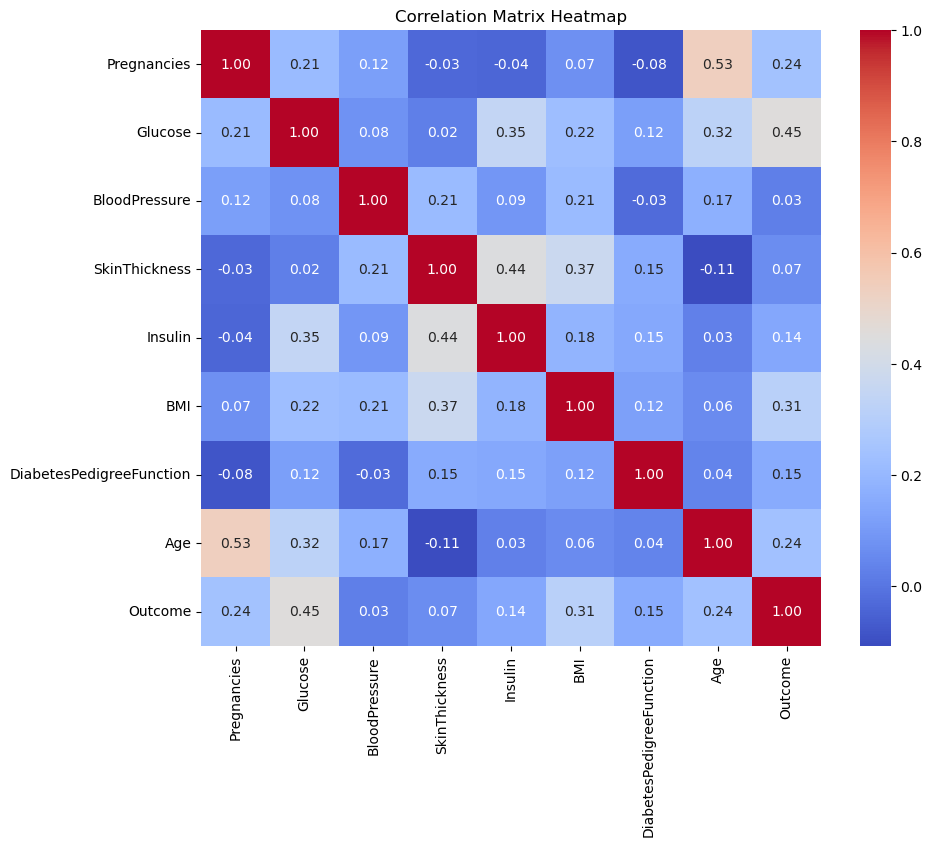

In [9]:
# Compute the correlation matrix from cov and varmat
corr = cov / varmat

# Plot the annotated heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=diabetesData.columns, yticklabels=diabetesData.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the heatmap read the following correlations.

In [10]:
#Corr(BMI, Outcome)
Corr1 = 0.31

#Corr(Glucose, Outcome)
Corr2 = 0.45

#Corr(Pregnancies, Outcome)
Corr3 = 0.24

bestcorr = ['Pregnancies', 'Age']


## Section 2

In this section a logistic regression model will be trained on the diabetes dataset to predict the risk of diabetes given patient data. Then use it will be used to perform predictions on previously unseen (test) data.

**Q4.** Preprocess Data.
 
Implementing a function normalizeData that normalizes each column of a data array. Recall that a column $x$ is normalized by $z = \frac{x - mean(x)}{std(x)}$. The function should return the normalized data matrix and the mean and standard deviations of each column (These will be needed to normalize the test data later).

In [11]:
def normalizeData(X, mean = np.array([]), std = np.array([])):    
    if mean.size == 0:
        mean = np.mean(X, axis=0)
    if std.size == 0:
        std = np.std(X, axis=0)
    normalized_X = (X - mean) / std
    return normalized_X, mean, std


**Q5.** Sigmoid function and it's derivative.

1. Implemented the sigmoid function. Given a numpy array, compute the sigmoid values of the array. It should return an array of sigmoid values. If you see any overflow errors/warnings popping up, that is because the numbers coming out of the exponential function $e^{-t}$ in the sigmoid function are too large to handle. In that case, please clip the input between some large enough negative and positive value (look into numpy.clip).
2. Implemented the derivative of the sigmoid function. Recall that if, $p = \sigma(t)$, then $p' = p(1-p)$. The function should take in an array of $p$ values and then return the array of $p'$. 


In [12]:
def sigmoid(t):    
    t_clipped = np.clip(t, -500, 500) # Clip input to avoid overflow in exp
    sig = 1 / (1 + np.exp(-t_clipped))
    return sig

In [13]:
def derivSigmoid(p):
    deriv_p = p * (1 - p)
    return deriv_p

**Q6.** Computing sigmoid probabilities.

Recall that $p = P(y = 1 | x) = \sigma(x^T \omega + b)$, where $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \vdots \\ \omega_d \end{bmatrix}$ are the weights and $b$ is the bias term. Implemented a function sigProg to calculate those probabilities, given a matrix $X$ of data, weight vector $\omega$ and bias $b$. It is possible to compute the array of probabilities for the entire dataset at once without a single for-loop, by just using matrix mutltiplications, which is the rightway to achieve maximum efficiency. You are supposed to use the above implemented sigmoid function. This should return an array of probabilities.

In [14]:
def sigProg(X, w, b):
    t = X @ w + b  # Compute the linear combination
    p = sigmoid(t)  # Apply the sigmoid function
    return p

**Q7.** Computed loss gradient.

Recall that the loss function for logistic regression is given by,

$L(\omega, b) = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i)^2 + \lambda reg(\omega)$ where is the sigmoid probability $p_i = P(y_i = 1 | x_i)$ for the data point $(x_i, y_i)$ and $reg(\omega)$ is the regularization term - it could be either ridge $reg(\omega) = ||\omega||_2^2$ or lasso $reg(\omega) = ||\omega||_1$ or no regularization at all. $\lambda \geq 0$ is the regularization constant. $N$ is the number of datapoints.

Then, the gradient of the loss function with respect to $\omega$ and the derivative with respect to $b$ is given by,

$\nabla_{\omega}L = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i x_i \ + \ \lambda reg'(\omega)$

$\frac{\partial L}{\partial b} = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i$

Here,

$reg'(\omega) = \begin{cases} \omega \; &\textrm{ if ridge } \\ sign(\omega) \; &\textrm{ if lasso } \end{cases}$

Implemented a function named gradient to compute the gradient and derivative of the loss function, given data matrix $X$, output vector $y$, weight vector $\omega$ and bias $b$. The function should also be able to take in other parameters such as reg (= "none", "ridge" or "lasso") and lambda. It should return the gradient and derivative. All these computations can be done without a single for loop, only by using numpy builtins for matrix computations, which is the most desired way to achieve efficiency 

In [15]:
def gradient(X, y, w, b, reg = "none", Lambda = 0.1):
    N = X.shape[0]
    p = sigProg(X, w, b)   # Compute probabilities and their derivatives
    p_prime = derivSigmoid(p)
    error = (p - y) * p_prime    # Compute error term
    grad_w = (X.T @ error) / N   # Gradient w.r.t weights
    # Add regularization gradient if needed
    if reg == "ridge":
        grad_w += Lambda * w
    elif reg == "lasso":
        grad_w += Lambda * np.sign(w)
    
    deriv_b = np.sum(error) / N
    return grad_w, deriv_b

**Q8.** Gradient descent algorithm.

Recall the following update rule for gradient descent,

$\omega \leftarrow \omega - \eta \nabla_{\omega} L$

$b \leftarrow b - \eta \frac{\partial L}{\partial b}$

where $\eta > 0$ is the learning rate.

Implemented the gradient descent algorithm in a function grad_descent given the gradient vector $\nabla_{\omega} L$ (grad_w), derivative $\frac{\partial L}{\partial b}$ (deriv_b), weights $\omega$ and bias $b$. Also should be able to accept the learning rate $\eta$ (eta). The function should return the updated $\omega$ and $b$.

In [16]:
def grad_descent(grad_w, deriv_b, w, b, eta = 0.01):
    # Update weights and bias using gradient descent
    w = w - eta * grad_w
    b = b - eta * deriv_b
    return w, b

**Q9.** Train model

Implemented the function train. It should initialize $\omega$ and $b$ to some random values or zeros. Then interatively update the $\omega$ and $b$ using gradient descent, untill the number of interations reach the maximum number of interations specified as max_iter. The function will take in training data $(X, y)$, regularization details (type of reg, and $\lambda$), and learning rate $\eta$ (eta). Finally, it should return the trained $\omega$ and $b$.

In [17]:
def train(X, y, reg = 'none', Lambda = 0.1, eta = 0.01, max_iter = 1000):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0.0
    # Iteratively update weights and bias
    for _ in range(max_iter):
        grad_w, deriv_b = gradient(X, y, w, b, reg, Lambda)
        w, b = grad_descent(grad_w, deriv_b, w, b, eta)
    return w, b

**Q10.** Predict using the model

Implemented a function predict to output predictions for given input data $X$, trained weights $\omega$ and $b$. Make sure that the output should only consist of $1$'s and $0$'s. The function should return the predictions $\hat{y}$ (yhat).

In [18]:
def predict(X, w, b):
    p = sigProg(X, w, b)
    yhat = (p >= 0.5).astype(int)
    return yhat

**Q11.** Used the above logistic regression algorithm on the diabetes dataset. Train a model ($\omega$, $b$). Then evaluate it. Use classification error to evaluate it.

Start by separating the diabetesData into input (features) and output (Outcome), and store them in numpy matrices X_train and y_train respectively, and then normalizing the input features.

Some tips to improve accuracy.

1. Use cross validation to find the best hyperparameters $\eta$, $\lambda$, and regularization type.
2. Plot the loss function versus iterations while training (you can do this by additionally collecting the loss values within the train function), having a smooth decreasing graph will indicate proper training.
3. As above plot the $\ell_2$-norm of the $\omega$ vector versus iterations, we expect smooth decreasing curve for this as well.

More tips and additional clarifications in class.

Best params: eta=0.1, Lambda=0.001, reg=lasso
Best classification error: 0.24310776942355888
Best classification accuracy: 0.7568922305764412


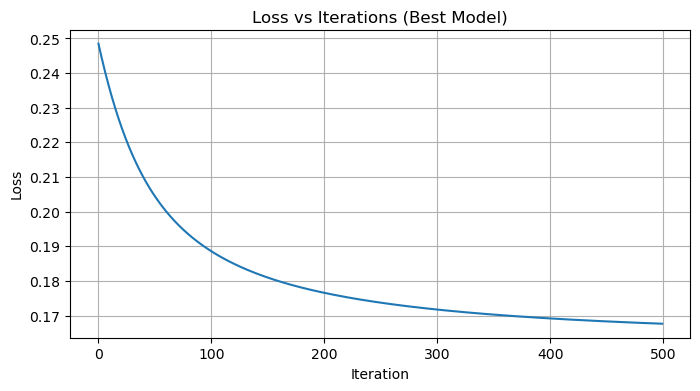

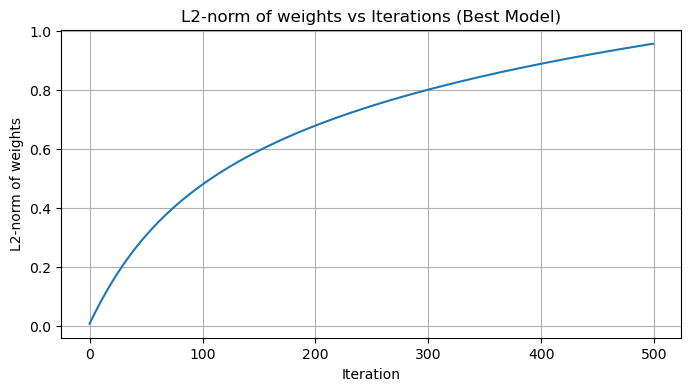

In [19]:
from itertools import product
import matplotlib.pyplot as plt

# Prepare training data before cross-validation
X_train = diabetesData.drop('Outcome', axis=1).values
y_train = diabetesData['Outcome'].values
X_train_norm, mean_train, std_train = normalizeData(X_train)

# Hyperparameter grid for cross-validation
etas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
lambdas = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0]
regs = ['none', 'ridge', 'lasso']

best_error = float('inf')
best_params = None
best_w = None
best_b = None
best_loss_hist = None
best_norm_hist = None

def train_with_history(X, y, reg='none', Lambda=0.1, eta=0.01, max_iter=1000):
    w = np.zeros(X.shape[1])
    b = 0.0
    loss_hist = []
    norm_hist = []
    for _ in range(max_iter):
        grad_w, deriv_b = gradient(X, y, w, b, reg, Lambda)
        w, b = grad_descent(grad_w, deriv_b, w, b, eta)
        # Compute loss and norm for plotting
        p = sigProg(X, w, b)
        loss = np.mean((p - y)**2) + Lambda * (np.sum(w  **2) if reg == 'ridge' else np.sum(np.abs(w)) if reg == 'lasso' else 0)
        norm = np.linalg.norm(w)
        loss_hist.append(loss)
        norm_hist.append(norm)
    return w, b, loss_hist, norm_hist

# Cross-validation loop
for eta, Lambda, reg in product(etas, lambdas, regs):
    w_cv, b_cv, loss_hist, norm_hist = train_with_history(X_train_norm, y_train, reg=reg, Lambda=Lambda, eta=eta, max_iter=500)
    y_train_pred_cv = predict(X_train_norm, w_cv, b_cv)
    error_cv = np.mean(y_train_pred_cv != y_train)
    if error_cv < best_error:
        best_error = error_cv
        best_params = (eta, Lambda, reg)
        best_w = w_cv
        best_b = b_cv
        best_loss_hist = loss_hist
        best_norm_hist = norm_hist

print(f"Best params: eta={best_params[0]}, Lambda={best_params[1]}, reg={best_params[2]}")
print(f"Best classification error: {best_error}")
print(f"Best classification accuracy: {1 - best_error}")

plt.figure(figsize=(8,4))
plt.plot(best_loss_hist)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iterations (Best Model)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(best_norm_hist)
plt.xlabel('Iteration')
plt.ylabel('L2-norm of weights')
plt.title('L2-norm of weights vs Iterations (Best Model)')
plt.grid(True)
plt.show()


**Q12.** Testing on previously unseen test data - final part.

1. Load the DiabetesTest.csv file.
2. Use your best trained model to predict the 'Outcome' for this test data, assign your predictions to y_test_pred, this should be an array of $0$'s and $1$'s.
3. This will be graded on the level of accuracy of your predictions.
4. Remember to properly normalize your data before using them in the model. For normalization use the mean and standard deviation of the training data not the test data.


In [20]:
# Load the test data
diabetesTest = pd.read_csv('DiabetesTest.csv')
# Display the first few rows of the dataset
print(diabetesTest.head())

if 'Outcome' in diabetesTest.columns:
    X_test = diabetesTest.drop('Outcome', axis=1).values
else:
    X_test = diabetesTest.values

X_test_norm, _, _ = normalizeData(X_test, mean_train, std_train)
y_test_pred = predict(X_test_norm, best_w, best_b)

print('Test predictions:', y_test_pred)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       89             66             23       94  28.1   
1            3       78             50             32       88  31.0   
2            7      147             76              0        0  39.4   
3            1       97             66             15      140  23.2   
4            4      111             72             47      207  37.1   

   DiabetesPedigreeFunction  Age  
0                     0.167   21  
1                     0.248   26  
2                     0.257   43  
3                     0.487   22  
4                     1.390   56  
Test predictions: [0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1]
